# Genome Size Vs Complexity

### Imports

In [43]:
from logic_gates import run_evolution_strong_selection, run_random_walk, Circuit
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict, Counter
from tqdm.notebook import tqdm

Setting up some utility functions and an object to track isomorphisms

In [44]:
def construct_genome(size: int) -> list:
    genome = []
    for i in range(size):
        genome += [0, 1]
    genome += [2]
    return genome

class IsomorphismCounter:

    def __init__(self):
        self.counter = defaultdict(Counter)

    def add(self, network, size: int):
        for key in self.counter:
            if key.is_isomorphic(network, pruned=True):
                self.counter[key][size] += 1
                self.counter[key]["total"] += 1
                return key
        self.counter[network][size] += 1
        self.counter[network]["total"] += 1
        return network

    def get_networks(self):
        return self.counter.keys()

    def get_number_by_size(self, size: int):
        return {key: value[size] for key, value in self.counter.items()}

    def get_number_networks_total(self):
        return {key: value['total'] for key, value in self.counter.items()}

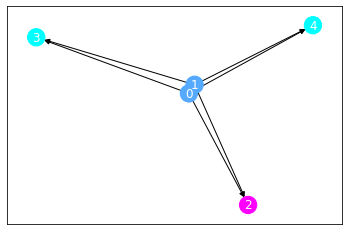

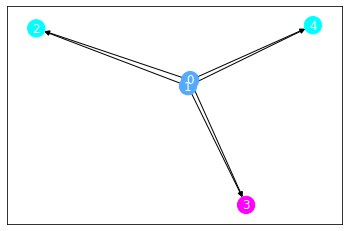

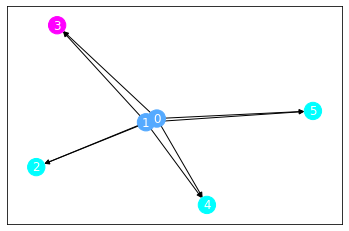

In [45]:
circuit1 = Circuit(2, [0, 1, 0, 1, 0, 1, 2])
circuit1.plot_network()
plt.show()
circuit2 = Circuit(2, [0, 1, 0, 1, 0, 1, 3])
circuit2.plot_network()
plt.show()
circuit3 = Circuit(2, [0, 1, 0, 1, 0, 1, 0, 1, 3])
circuit3.plot_network()
plt.show()

In [46]:
testCounter = IsomorphismCounter()
testCounter.add(circuit1, 3)
testCounter.add(circuit2, 3)
testCounter.add(circuit3, 4)
testCounter.get_number_by_size(3)

{[0, 1, 0, 1, 0, 1, 2]: 2}

Goal Function

In [47]:
def goal_function(x: [bool]) -> bool:
    return x[0] and x[1]

Now the actual simulation

2


  0%|          | 0/100 [00:00<?, ?it/s]

Median:2267.0
Mean:3785.31
STD:4963.079613899015
3


  0%|          | 0/100 [00:00<?, ?it/s]

Median:885.0
Mean:2941.77
STD:4615.9843714098515
4


  0%|          | 0/100 [00:00<?, ?it/s]

Median:593.5
Mean:2231.74
STD:3157.0896807661325
5


  0%|          | 0/100 [00:00<?, ?it/s]

Median:181.0
Mean:1973.6
STD:3147.5702152612894
6


  0%|          | 0/100 [00:00<?, ?it/s]

Median:74.0
Mean:1672.13
STD:3261.5678029285245
7


  0%|          | 0/100 [00:00<?, ?it/s]

Median:99.5
Mean:1972.51
STD:3658.7185967084156
8


  0%|          | 0/100 [00:00<?, ?it/s]

Median:83.0
Mean:1361.39
STD:2968.0330216997254
9


  0%|          | 0/100 [00:00<?, ?it/s]

Median:92.0
Mean:1665.63
STD:3412.423542454834
10


  0%|          | 0/100 [00:00<?, ?it/s]

Median:83.0
Mean:1401.34
STD:3054.8593166298183
11


  0%|          | 0/100 [00:00<?, ?it/s]

Median:98.0
Mean:1672.5
STD:4025.5709545355176
12


  0%|          | 0/100 [00:00<?, ?it/s]

Median:105.0
Mean:1634.9
STD:3794.7327112722974
13


  0%|          | 0/100 [00:00<?, ?it/s]

Median:115.5
Mean:1434.65
STD:3269.343179829857


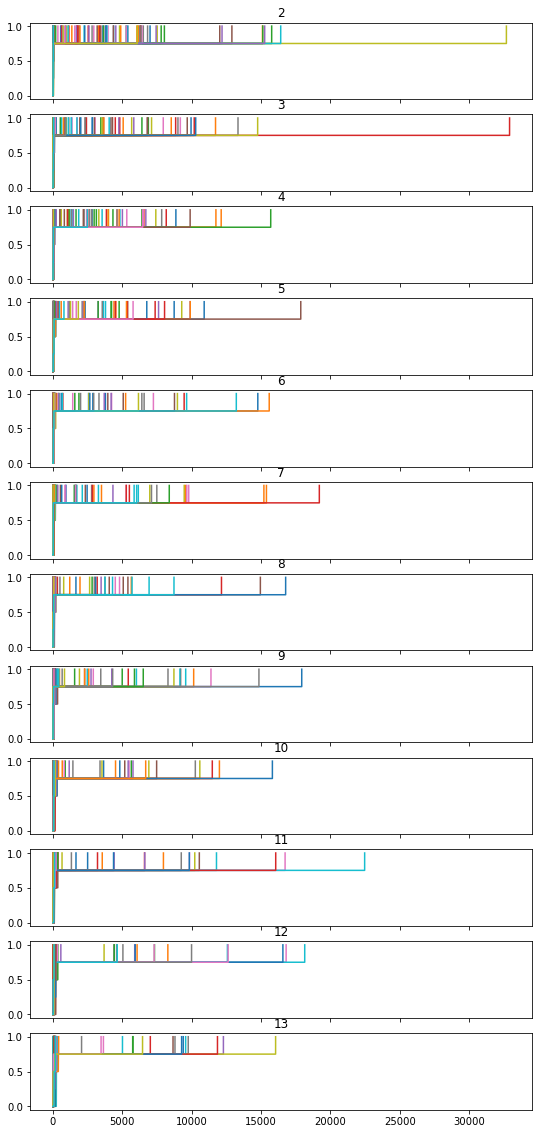

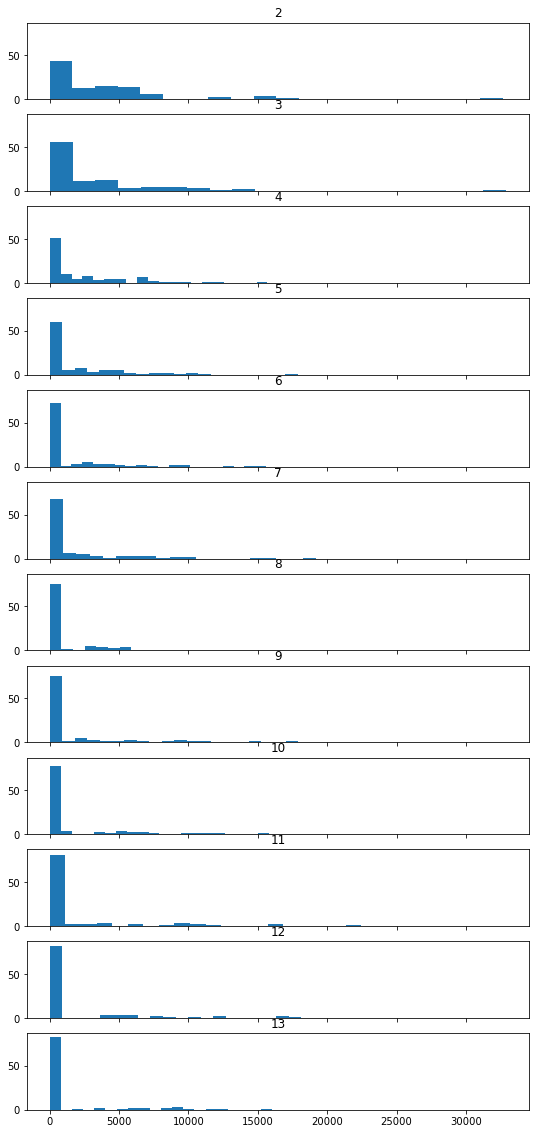

In [48]:
sizes = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
fig_trajectory, ax_trajectories = plt.subplots(len(sizes), 1, sharex=True, sharey=True, figsize=(9, 20))
fig_histogram, ax_histograms = plt.subplots(len(sizes), 1, sharex=True, sharey=True, figsize=(9, 20))
means = []
medians = []
stds = []
isomorphism_counter = IsomorphismCounter()
num_trials = 100
for size, ax_trajectory, ax_histogram in zip(sizes, ax_trajectories, ax_histograms):
    ax_trajectory.set_title(size)
    ax_histogram.set_title(size)
    initial_circuit = Circuit(2, construct_genome(size))
    total_times = []
    print(size)
    for i in tqdm(range(num_trials)):
        time, circuits, fitness = run_evolution_strong_selection(goal_function, 1000, 0.1, initial_circuit, 1000000)
        total_times.append(len(time))
        ax_trajectory.plot(fitness)
        isomorphism_counter.add(circuits[-1], size)
    total_times_array = np.array(total_times)
    medians.append(np.median(total_times_array))
    print("Median:" + str(medians[-1]))
    means.append(total_times_array.mean())
    print("Mean:" + str(means[-1]))
    stds.append(total_times_array.std())
    print("STD:" + str(stds[-1]))
    ax_histogram.hist(total_times, 20)
fig_trajectory.savefig('trajectories.png', dpi=1200)
fig_histogram.savefig('histogram_fixations100.png')
plt.show()

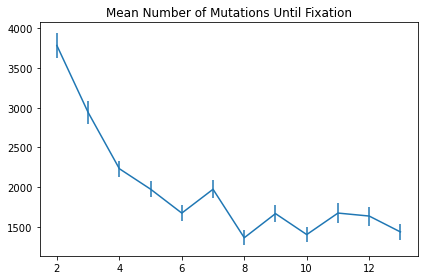

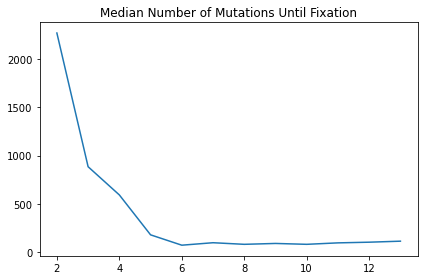

In [49]:
fig, ax = plt.subplots(1, 1, tight_layout=True)
ax.errorbar(x=sizes, y=means, yerr=np.array(stds)/np.sqrt(1000))
ax.set_title("Mean Number of Mutations Until Fixation")
plt.show()

fig, ax = plt.subplots(1, 1, tight_layout=True)
ax.errorbar(x=sizes, y=medians)
ax.set_title("Median Number of Mutations Until Fixation")
plt.show()

Maybe this can in some way be connected to the fact that adding more area for the binding site (more flexibility) leads to a greater chance of evolution. If I understood that correctly the other day.

Counter({'total': 413, 2: 100, 3: 74, 4: 48, 5: 39, 7: 39, 6: 29, 8: 24, 9: 16, 10: 14, 11: 13, 12: 11, 13: 6})


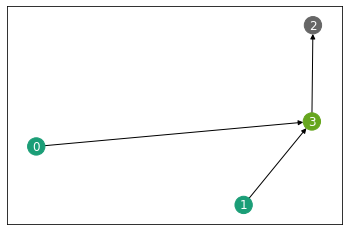

Counter({'total': 655, 13: 82, 12: 79, 10: 76, 11: 70, 9: 67, 8: 61, 6: 54, 5: 49, 7: 49, 4: 42, 3: 26})


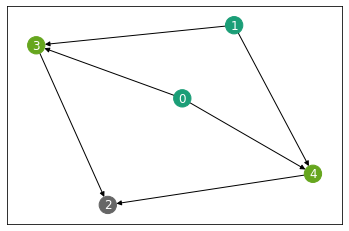

Counter({'total': 20, 5: 6, 4: 5, 9: 3, 6: 2, 7: 2, 8: 1, 11: 1})


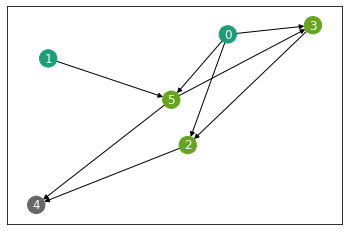

Counter({'total': 7, 6: 2, 4: 1, 5: 1, 7: 1, 8: 1, 9: 1})


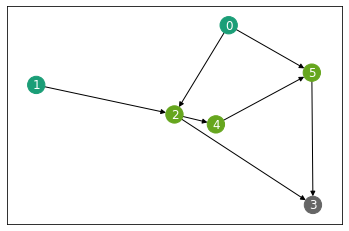

Counter({'total': 10, 6: 3, 4: 2, 8: 2, 5: 1, 9: 1, 12: 1})


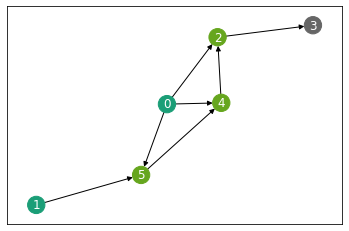

Counter({'total': 8, 5: 2, 7: 2, 10: 2, 6: 1, 13: 1})


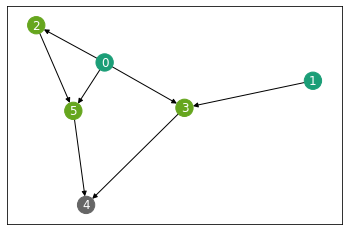

Counter({'total': 7, 6: 2, 8: 2, 5: 1, 9: 1, 11: 1})


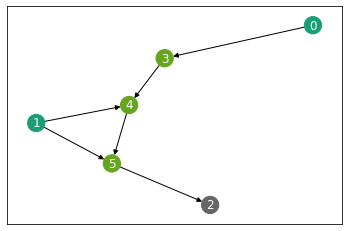

In [50]:
network_counter = isomorphism_counter.counter
for key, value in network_counter.items():
    if value['total'] > 4:
        print(value)
        key.plot_network(prune=True)
        plt.show()

In [51]:
list_unique_networks = list(isomorphism_counter.counter.keys())
list_unique_networks[:5]

[[3, 3, 1, 0, 2],
 [4, 3, 0, 1, 0, 1, 2],
 [3, 0, 0, 5, 2, 5, 0, 1, 4],
 [5, 5, 4, 4, 2, 0, 1, 1, 3],
 [4, 4, 1, 0, 5, 5, 3, 3, 2]]

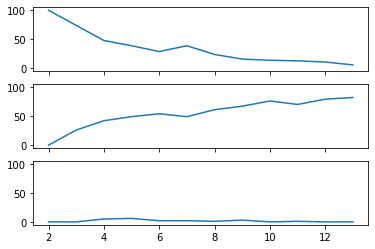

In [61]:
figs, axs = plt.subplots(3, 1, sharex=True, sharey=True)
for ax, network in zip(axs, list_unique_networks[:5]):
    ax.plot(sizes, [isomorphism_counter.get_number_by_size(size)[network] for size in sizes])

In [53]:
len(isomorphism_counter.counter)

78

Now to test how unique this behavior is via a random walk

2


  0%|          | 0/100 [00:00<?, ?it/s]

Median:70.5
Mean:87.62
STD:70.43532920346152
3


  0%|          | 0/100 [00:00<?, ?it/s]

Median:69.0
Mean:88.23
STD:91.01723518103591
4


  0%|          | 0/100 [00:00<?, ?it/s]

Median:59.0
Mean:80.51
STD:87.29908304214884
5


  0%|          | 0/100 [00:00<?, ?it/s]

Median:58.0
Mean:84.75
STD:83.12404886673892
6


  0%|          | 0/100 [00:00<?, ?it/s]

Median:67.0
Mean:89.67
STD:87.7256011663642
7


  0%|          | 0/100 [00:00<?, ?it/s]

Median:53.5
Mean:79.67
STD:81.9928112702571
8


  0%|          | 0/100 [00:00<?, ?it/s]

Median:60.0
Mean:78.51
STD:67.46295205518359
9


  0%|          | 0/100 [00:00<?, ?it/s]

Median:65.5
Mean:88.31
STD:74.20669713711828
10


  0%|          | 0/100 [00:00<?, ?it/s]

Median:80.5
Mean:105.12
STD:98.52200566370946
11


  0%|          | 0/100 [00:00<?, ?it/s]

Median:66.5
Mean:95.9
STD:82.67557075702592
12


  0%|          | 0/100 [00:00<?, ?it/s]

Median:61.0
Mean:85.92
STD:80.90039307691897
13


  0%|          | 0/100 [00:00<?, ?it/s]

Median:76.5
Mean:99.61
STD:83.40670176910245


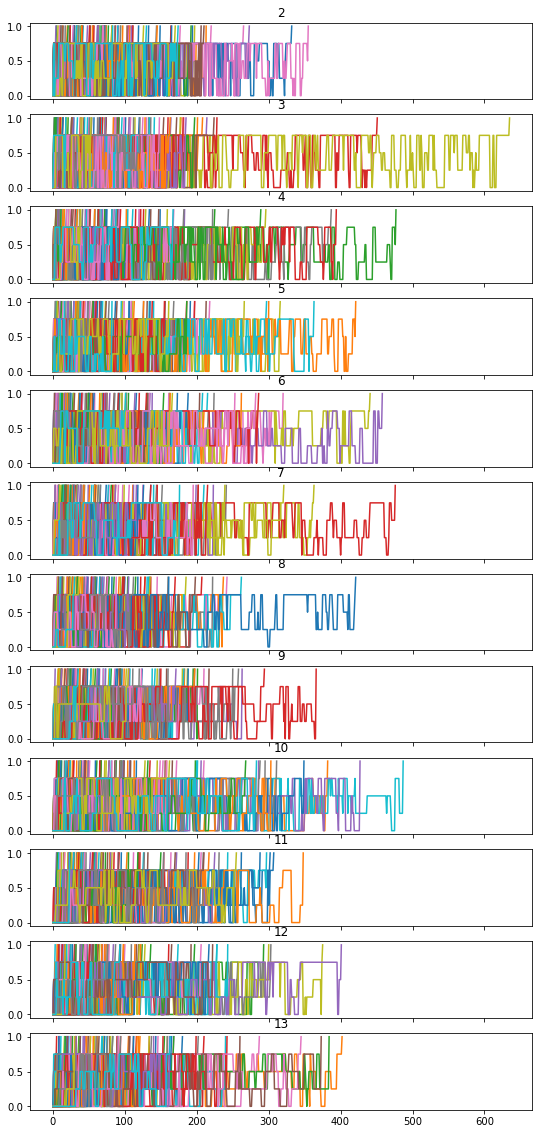

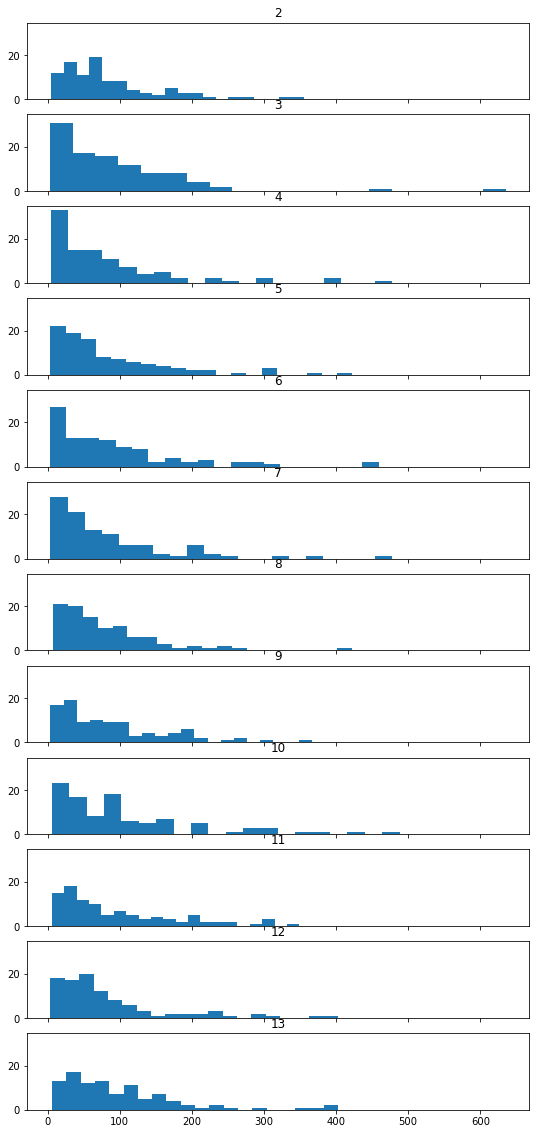

In [54]:
fig_trajectory, ax_trajectories = plt.subplots(len(sizes), 1, sharex=True, sharey=True, figsize=(9, 20))
fig_histogram, ax_histograms = plt.subplots(len(sizes), 1, sharex=True, sharey=True, figsize=(9, 20))
means = []
medians = []
stds = []
isomorphism_counter_random_walk = IsomorphismCounter()
num_trials = 100
for size, ax_trajectory, ax_histogram in zip(sizes, ax_trajectories, ax_histograms):
    ax_trajectory.set_title(size)
    ax_histogram.set_title(size)
    initial_circuit = Circuit(2, construct_genome(size))
    total_times = []
    print(size)
    for i in tqdm(range(num_trials)):
        time, circuits, fitness = run_random_walk(goal_function, 1000, 0.1, initial_circuit, 1000000)
        total_times.append(len(time))
        ax_trajectory.plot(fitness)
        isomorphism_counter_random_walk.add(circuits[-1], str(size) + " Random Walk")
    total_times_array = np.array(total_times)
    medians.append(np.median(total_times_array))
    print("Median:" + str(medians[-1]))
    means.append(total_times_array.mean())
    print("Mean:" + str(means[-1]))
    stds.append(total_times_array.std())
    print("STD:" + str(stds[-1]))
    ax_histogram.hist(total_times, 20)
fig_trajectory.savefig('trajectories.png', dpi=1200)
fig_histogram.savefig('histogram_fixations100.png')
plt.show()

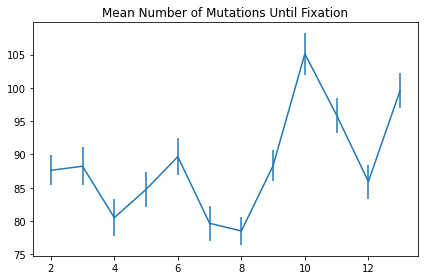

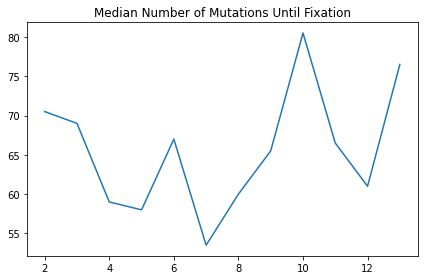

In [55]:
fig, ax = plt.subplots(1, 1, tight_layout=True)
ax.errorbar(x=sizes, y=means, yerr=np.array(stds)/np.sqrt(1000))
ax.set_title("Mean Number of Mutations Until Fixation")
plt.show()

fig, ax = plt.subplots(1, 1, tight_layout=True)
ax.errorbar(x=sizes, y=medians)
ax.set_title("Median Number of Mutations Until Fixation")
plt.show()

Counter({'total': 470, '2 Random Walk': 100, '3 Random Walk': 84, '4 Random Walk': 65, '5 Random Walk': 60, '6 Random Walk': 37, '7 Random Walk': 28, '8 Random Walk': 23, '10 Random Walk': 23, '9 Random Walk': 17, '13 Random Walk': 16, '11 Random Walk': 9, '12 Random Walk': 8})


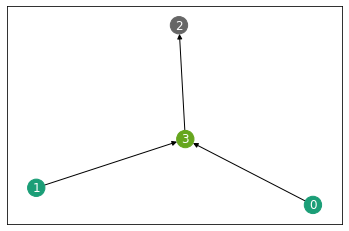

Counter({'total': 170, '4 Random Walk': 20, '6 Random Walk': 19, '11 Random Walk': 18, '8 Random Walk': 17, '3 Random Walk': 16, '9 Random Walk': 16, '7 Random Walk': 15, '10 Random Walk': 15, '12 Random Walk': 13, '5 Random Walk': 11, '13 Random Walk': 10})


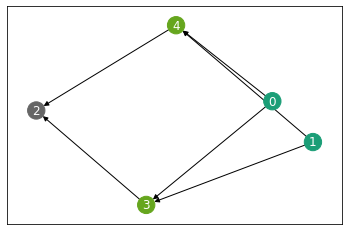

Counter({'total': 57, '12 Random Walk': 9, '7 Random Walk': 7, '8 Random Walk': 7, '6 Random Walk': 6, '9 Random Walk': 6, '4 Random Walk': 5, '13 Random Walk': 5, '5 Random Walk': 4, '10 Random Walk': 4, '11 Random Walk': 4})


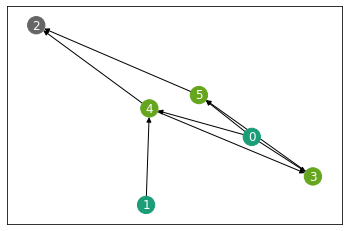

Counter({'total': 29, '7 Random Walk': 6, '8 Random Walk': 6, '6 Random Walk': 4, '5 Random Walk': 3, '10 Random Walk': 3, '9 Random Walk': 2, '12 Random Walk': 2, '4 Random Walk': 1, '11 Random Walk': 1, '13 Random Walk': 1})


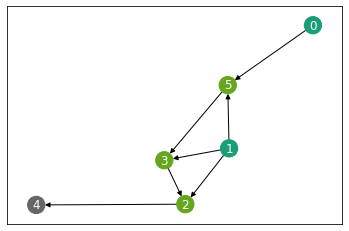

Counter({'total': 40, '6 Random Walk': 8, '7 Random Walk': 7, '10 Random Walk': 7, '4 Random Walk': 5, '9 Random Walk': 4, '11 Random Walk': 4, '8 Random Walk': 3, '5 Random Walk': 2})


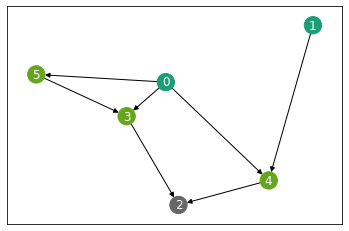

Counter({'total': 10, '5 Random Walk': 2, '9 Random Walk': 2, '4 Random Walk': 1, '6 Random Walk': 1, '7 Random Walk': 1, '8 Random Walk': 1, '11 Random Walk': 1, '12 Random Walk': 1})


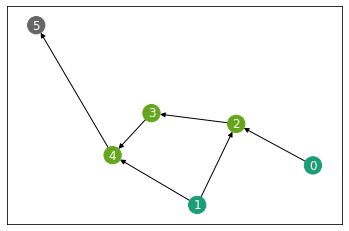

Counter({'total': 12, '7 Random Walk': 3, '5 Random Walk': 2, '13 Random Walk': 2, '4 Random Walk': 1, '6 Random Walk': 1, '8 Random Walk': 1, '9 Random Walk': 1, '11 Random Walk': 1})


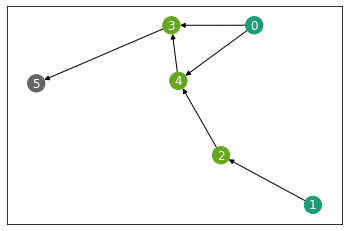

Counter({'total': 9, '6 Random Walk': 3, '4 Random Walk': 2, '7 Random Walk': 1, '9 Random Walk': 1, '10 Random Walk': 1, '12 Random Walk': 1})


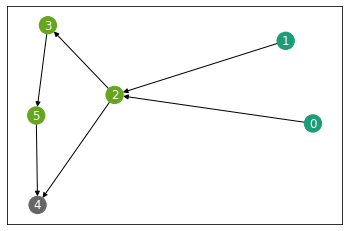

Counter({'total': 6, '5 Random Walk': 3, '8 Random Walk': 1, '9 Random Walk': 1, '11 Random Walk': 1})


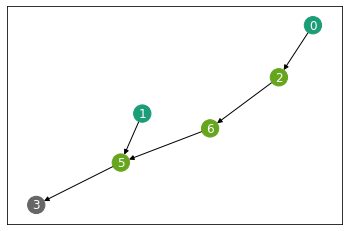

Counter({'total': 6, '9 Random Walk': 2, '5 Random Walk': 1, '7 Random Walk': 1, '8 Random Walk': 1, '10 Random Walk': 1})


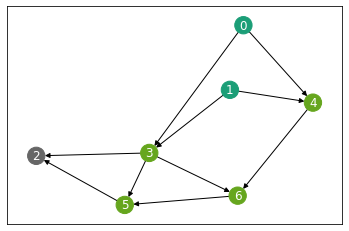

Counter({'total': 5, '5 Random Walk': 1, '7 Random Walk': 1, '8 Random Walk': 1, '10 Random Walk': 1, '11 Random Walk': 1})


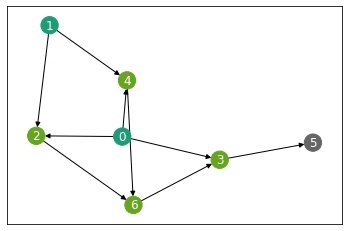

Counter({'total': 16, '7 Random Walk': 4, '5 Random Walk': 2, '6 Random Walk': 2, '9 Random Walk': 2, '12 Random Walk': 2, '8 Random Walk': 1, '10 Random Walk': 1, '11 Random Walk': 1, '13 Random Walk': 1})


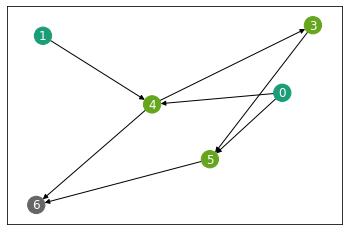

Counter({'total': 6, '5 Random Walk': 1, '6 Random Walk': 1, '9 Random Walk': 1, '11 Random Walk': 1, '12 Random Walk': 1, '13 Random Walk': 1})


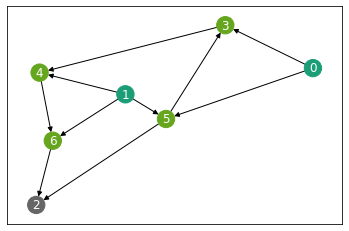

Counter({'total': 8, '6 Random Walk': 3, '5 Random Walk': 1, '8 Random Walk': 1, '9 Random Walk': 1, '10 Random Walk': 1, '13 Random Walk': 1})


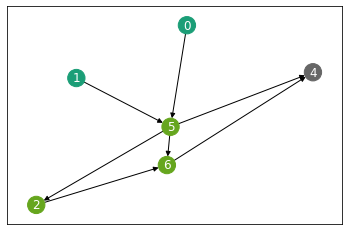

Counter({'total': 10, '12 Random Walk': 3, '7 Random Walk': 2, '5 Random Walk': 1, '6 Random Walk': 1, '9 Random Walk': 1, '11 Random Walk': 1, '13 Random Walk': 1})


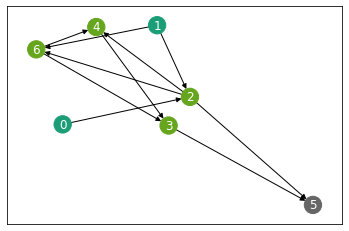

Counter({'total': 7, '8 Random Walk': 2, '6 Random Walk': 1, '7 Random Walk': 1, '9 Random Walk': 1, '11 Random Walk': 1, '13 Random Walk': 1})


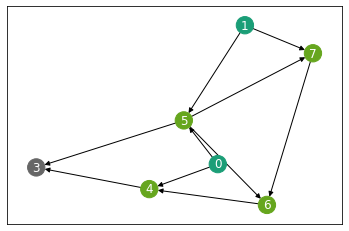

Counter({'total': 5, '6 Random Walk': 1, '7 Random Walk': 1, '8 Random Walk': 1, '10 Random Walk': 1, '13 Random Walk': 1})


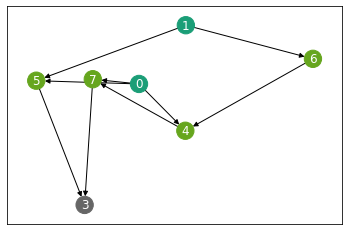

Counter({'total': 18, '10 Random Walk': 4, '7 Random Walk': 3, '9 Random Walk': 3, '13 Random Walk': 3, '11 Random Walk': 2, '12 Random Walk': 2, '8 Random Walk': 1})


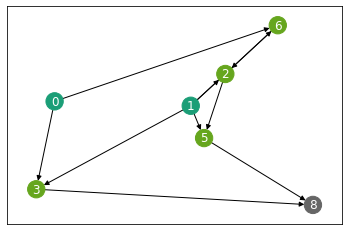

Counter({'total': 5, '10 Random Walk': 3, '8 Random Walk': 2})


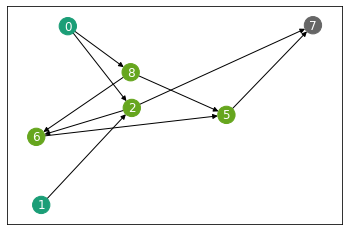

Counter({'total': 6, '11 Random Walk': 2, '13 Random Walk': 2, '9 Random Walk': 1, '12 Random Walk': 1})


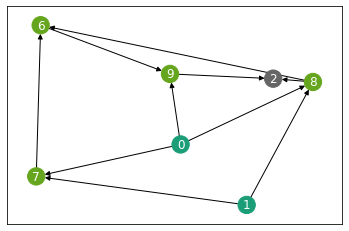

In [56]:
network_counter_random_walk = isomorphism_counter_random_walk.counter
for key, value in network_counter_random_walk.items():
    if value['total'] > 4:
        print(value)
        key.plot_network(prune=True)
        plt.show()

In [57]:
list_unique_networks_random_walk = list(isomorphism_counter_random_walk.counter.keys())
list_unique_networks_random_walk[:5]

[[3, 3, 1, 0, 2],
 [4, 3, 1, 0, 1, 0, 2],
 [5, 4, 4, 0, 0, 1, 0, 3, 2],
 [3, 1, 5, 1, 2, 2, 1, 0, 4],
 [4, 3, 0, 5, 0, 1, 0, 0, 2]]

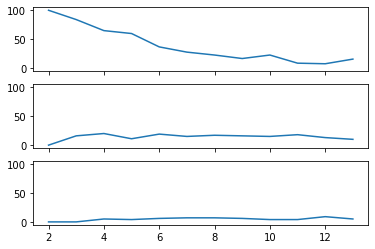

In [60]:
figs, axs = plt.subplots(3, 1, sharex=True, sharey=True)
for ax, network in zip(axs, list_unique_networks_random_walk):
    ax.plot(sizes, [isomorphism_counter_random_walk.get_number_by_size(str(size) + " Random Walk")[network] for size in sizes])

We are seeing tradeoff -> resilance vs speed

Track resilance score for each network